In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [158]:
df=pd.read_csv('/content/homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
3,1521,3,75.00
0,1056,2,39.07
6,2732,4,135.00
16,1180,3,48.00
11,2785,4,140.00


# Scaling Data

In [159]:
from sklearn.preprocessing import MinMaxScaler 
sx=MinMaxScaler()
sy=MinMaxScaler()
scaled_x=sx.fit_transform(df.drop('price',axis='columns').values)
pd.DataFrame(scaled_x)

,0,1
0,0.088276,0.25
1,0.620690,0.75
2,0.220690,0.50
3,0.248621,0.50
4,0.137931,0.25
5,0.127586,0.25
6,0.666207,0.75
7,0.862069,0.75
8,0.175862,0.50
9,1.000000,1.00


In [160]:
df.shape

(20, 3)

In [161]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [162]:
w=np.ones(shape=(2))
w

array([1., 1.])

# Creating Mini Batch Gradient Descent Function 

In [163]:
def mini_batch_gradient_descent(X,y_true,epochs=100,batch_size=5,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]

    if batch_size>total_samples:
        batch_size=total_samples

    cost_list=[]
    epoch_list=[]

    num_batches=int(total_samples/batch_size)

    for i in range(epochs):
        random_indices=np.random.permutation(total_samples)
        X_tmp=X[random_indices]
        y_tmp=y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            Xj=X_tmp[j:j+batch_size]
            yj=y_tmp[j:j+batch_size]
            y_predicted=np.dot(w,Xj.T)+b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost=np.mean(np.square(yj-y_predicted))

            if i%10==0:
                cost_list.append(cost)
                epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list            

In [164]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71004651, 0.67804166]), -0.2334716051366051, 0.01855356597580845)

# Graph of Cost/MSE vs Epoch

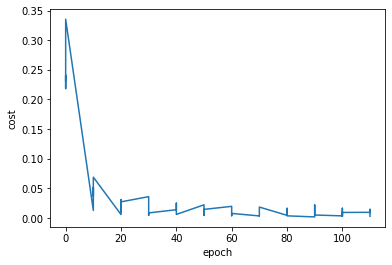

In [165]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

# Predicting Values

In [170]:
def predict(area,bedrooms,w,b):
    scaled_x=sx.transform([[area,bedrooms]])[0]
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1]+b

    return sy.inverse_transform([[scaled_price]])[0][0]

In [171]:
predict(2600,4,w,b)

128.63005200127998